# Trabajo de Juan

## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago
de Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo
que aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

* **Fecha-I** : Fecha y hora programada del vuelo.
* **Vlo-I** : Número de vuelo programado.
* **Ori-I** : Código de ciudad de origen programado.
* **Des-I** : Código de ciudad de destino programado.
* **Emp-I** : Código aerolínea de vuelo programado.
* **Fecha-O** : Fecha y hora de operación del vuelo.
* **Vlo-O** : Número de vuelo de operación del vuelo.
* **Ori-O** : Código de ciudad de origen de operación
* **Des-O** : Código de ciudad de destino de operación.
* **Emp-O** : Código aerolínea de vuelo operado.
* **DIA** : Día del mes de operación del vuelo.
* **MES** : Número de mes de operación del vuelo.
* **AÑO** : Año de operación del vuelo.
* **DIANOM** : Día de la semana de operación del vuelo.
* **TIPOVUELO** : Tipo de vuelo, I =Internacional, N =Nacional.
* **OPERA** : Nombre de aerolínea que opera.
* **SIGLAORI** : Nombre ciudad origen.
* **SIGLADES** : Nombre ciudad destino.

## Desarrollo

### 0. Obtención de datos

In [1]:
#Se importan las librerías necesarias para el problema
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msng
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
df = pd.read_csv('dataset_SCL.csv')

In [3]:
df.shape

(68206, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


<AxesSubplot:>

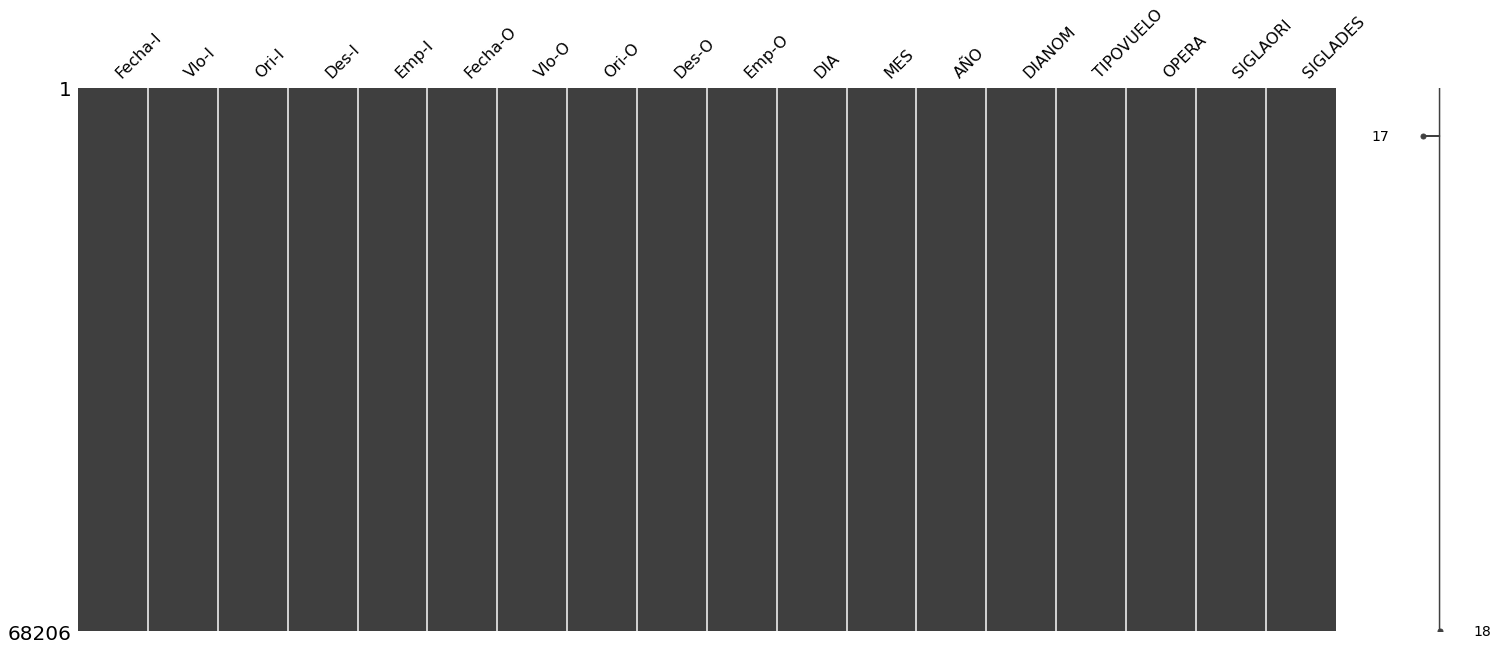

In [5]:
msng.matrix(df)

In [6]:
df.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

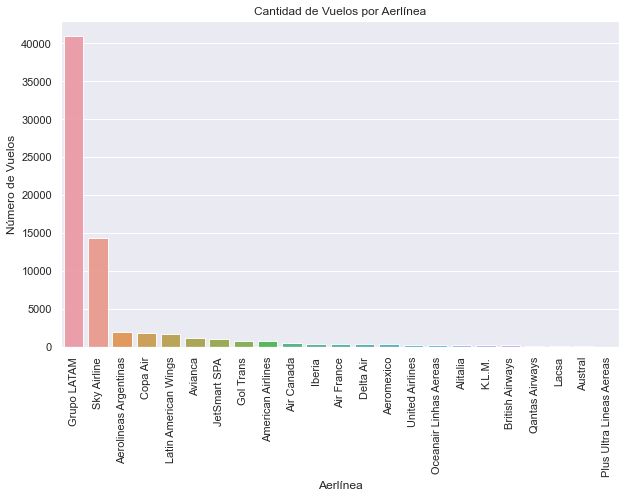

In [7]:
vuelos_aerolineas = df['OPERA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style="darkgrid")
sns.barplot(x=vuelos_aerolineas.index, y=vuelos_aerolineas.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Aerlínea')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Aerlínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

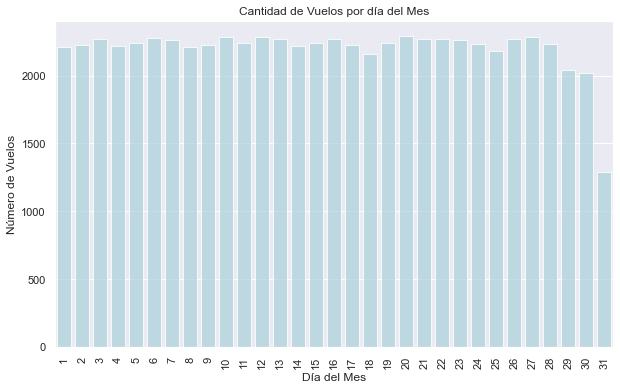

In [8]:
vuelos_dia = df['DIA'].value_counts()
plt.figure(figsize = (10,6))
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_dia.index, y=vuelos_dia.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

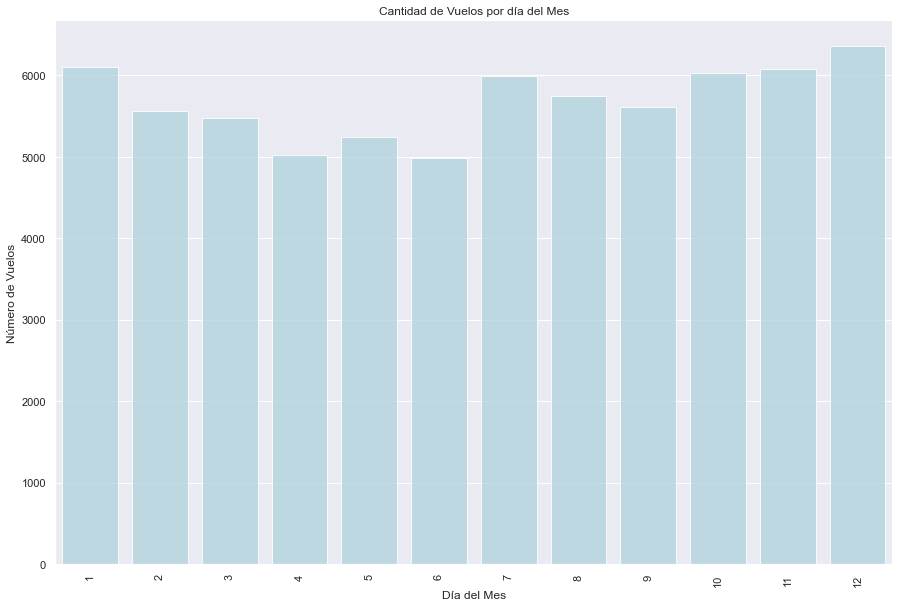

In [9]:
vuelos_mes = df['MES'].value_counts()
sns.set(style = "darkgrid")
sns.barplot(x=vuelos_mes.index, y=vuelos_mes.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por día del Mes')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día del Mes', fontsize=12)
plt.xticks(rotation=90)
plt.show()

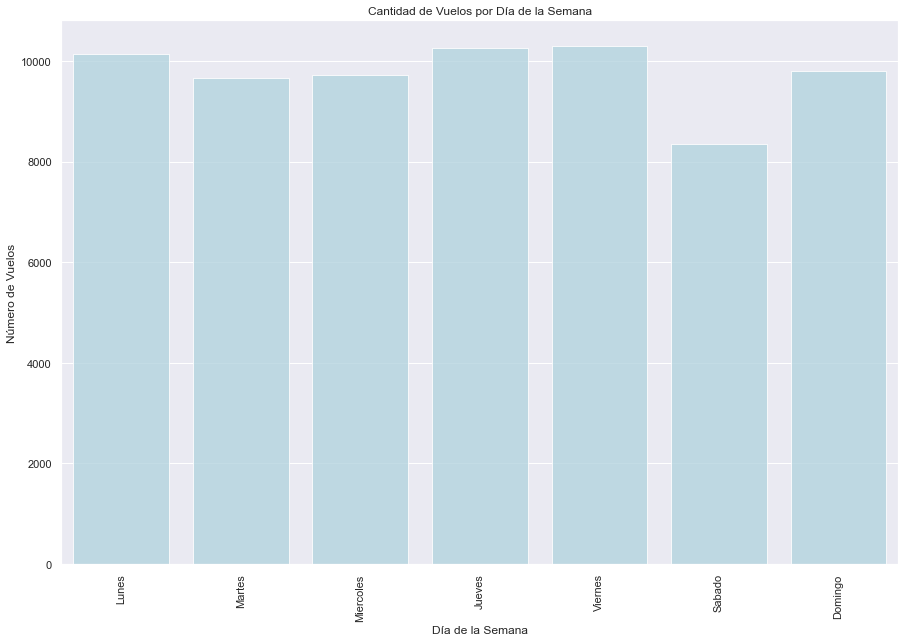

In [10]:
vuelos = df['DIANOM'].value_counts()
dias = [vuelos.index[2], vuelos.index[5], vuelos.index[4], vuelos.index[1], vuelos.index[0], vuelos.index[6], vuelos.index[3]]
valores_dias = [vuelos.values[2], vuelos.values[5], vuelos.values[4], vuelos.values[1], vuelos.values[0], vuelos.values[6], vuelos.values[3]]

sns.set(style="darkgrid")
sns.barplot(x=dias, y=valores_dias, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Día de la Semana')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Día de la Semana', fontsize=12)
plt.xticks(rotation=90)
plt.show()

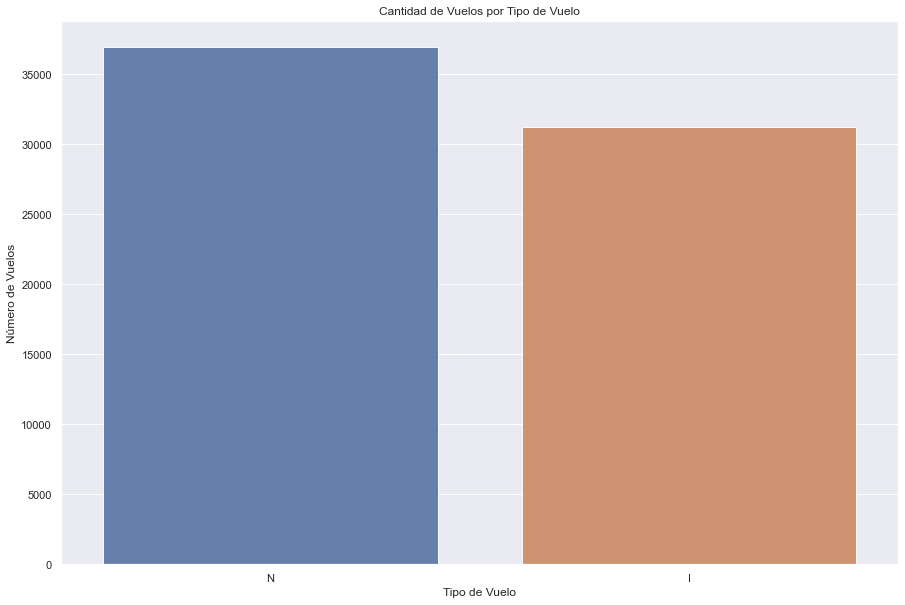

In [11]:
vuelos = df['TIPOVUELO'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, alpha=0.9)
plt.title('Cantidad de Vuelos por Tipo de Vuelo')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.show()

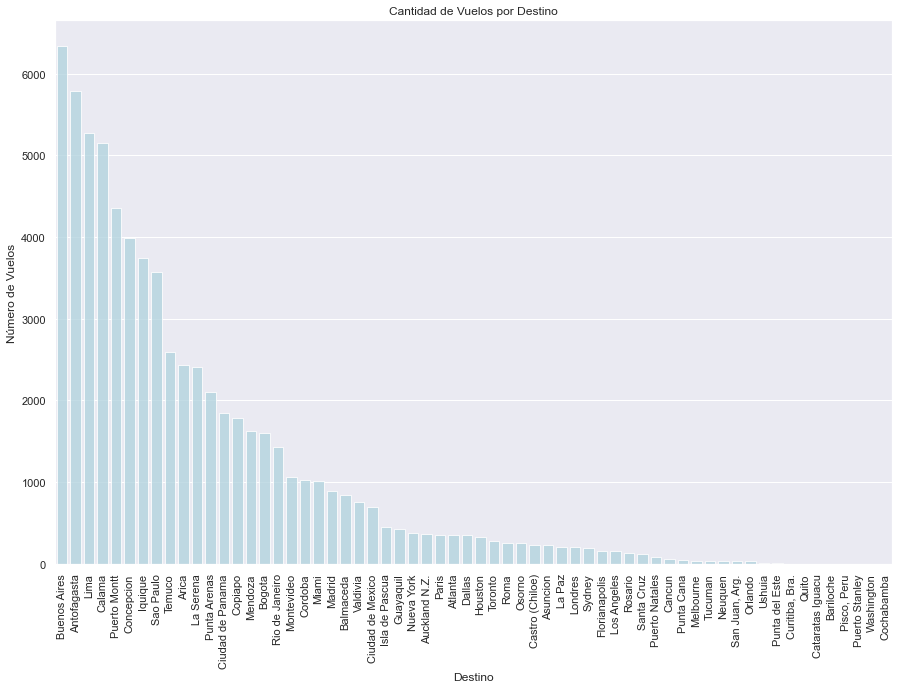

In [12]:
vuelos = df['SIGLADES'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=vuelos.index, y=vuelos.values, color = 'lightblue', alpha=0.8)
plt.title('Cantidad de Vuelos por Destino')
plt.ylabel('Número de Vuelos', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)

plt.show()

Respecto a las distribuciones, se puede ver que dentro de todo la data está distribuida de manera bastante balanceada. De todas formas se pueden notar ciertas particularidades en algunas columnas: 
* En las aerolíneas LATAM Airlines es la con mayor cantidad de vuelo debido a que es la más grande aquí en chile y es la que tiene mayor cantidad de destinos. SKY Airlines sería la segunda más grande y de ahí en adelante las demás son bastante similares en cuanto a vuelos. 
* En cuanto a los días del mes, se puede ver como el día 31 tiene menor cantidad que los demás días y esto se puede deber a que hay menos días 31 durante el año.
* Con los días de semana, el día sábado es el único en el que se nota una diferencia. Aquí puede ser porque la gente prefiere ese día para quedarse en donde sea que esté y aprovecharlo en caso que esté de viaje para poder recorrer o solamente descansar.
* Por parte de los destinos se puede ver que gran parte se lo llevan las ciudades chilenas del norte. Esto puede ser por un alto flujo en minería.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

* **temporada_alta** : 1 si **Fecha-I** está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no

In [13]:
from datetime import datetime

def temporada_alta(fecha):
    fecha_año = int(fecha.split('-')[0])
    fecha = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S')
    range1_min = datetime.strptime('15-Dec', '%d-%b').replace(year = fecha_año)
    range1_max = datetime.strptime('31-Dec', '%d-%b').replace(year = fecha_año)
    range2_min = datetime.strptime('1-Jan', '%d-%b').replace(year = fecha_año)
    range2_max = datetime.strptime('3-Mar', '%d-%b').replace(year = fecha_año)
    range3_min = datetime.strptime('15-Jul', '%d-%b').replace(year = fecha_año)
    range3_max = datetime.strptime('31-Jul', '%d-%b').replace(year = fecha_año)
    range4_min = datetime.strptime('11-Sep', '%d-%b').replace(year = fecha_año)
    range4_max = datetime.strptime('30-Sep', '%d-%b').replace(year = fecha_año)
    
    if ((fecha >= range1_min and fecha <= range1_max) or 
        (fecha >= range2_min and fecha <= range2_max) or 
        (fecha >= range3_min and fecha <= range3_max) or
        (fecha >= range4_min and fecha <= range4_max)):
        return 1
    else:
        return 0
    

In [14]:
df['temporada_alta'] = df['Fecha-I'].apply(temporada_alta)

In [15]:
df['temporada_alta'].value_counts()

0    46174
1    22032
Name: temporada_alta, dtype: int64

* **dif_min** : diferencia en minutos entre **Fecha-O** y **Fecha-I** .

In [16]:
def dif_min(data):
    fecha_o = datetime.strptime(data['Fecha-O'], '%Y-%m-%d %H:%M:%S')
    fecha_i = datetime.strptime(data['Fecha-I'], '%Y-%m-%d %H:%M:%S')
    dif_min = ((fecha_o - fecha_i).total_seconds())/60
    return dif_min
        

In [17]:
df['dif_min'] = df.apply(dif_min, axis = 1)

* **atraso_15** : 1 si **dif_min** > 15, 0 si no.

In [18]:
df['atraso_15'] = np.where(df['dif_min'] > 15, 1, 0)

In [19]:
df['atraso_15'].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

* **periodo_dia** : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a **Fecha-I**.

In [20]:
def get_periodo_dia(fecha):
    fecha_time = datetime.strptime(fecha, '%Y-%m-%d %H:%M:%S').time()
    mañana_min = datetime.strptime("05:00", '%H:%M').time()
    mañana_max = datetime.strptime("11:59", '%H:%M').time()
    tarde_min = datetime.strptime("12:00", '%H:%M').time()
    tarde_max = datetime.strptime("18:59", '%H:%M').time()
    noche_min1 = datetime.strptime("19:00", '%H:%M').time()
    noche_max1 = datetime.strptime("23:59", '%H:%M').time()
    noche_min2 = datetime.strptime("00:00", '%H:%M').time()
    noche_max2 = datetime.strptime("4:59", '%H:%M').time()
    
    if(fecha_time > mañana_min and fecha_time < mañana_max):
        return 'mañana'
    elif(fecha_time > tarde_min and fecha_time < tarde_max):
        return 'tarde'
    elif((fecha_time > noche_min1 and fecha_time < noche_max1) or
         (fecha_time > noche_min2 and fecha_time < noche_max2)):
        return 'noche'

In [21]:
df['periodo_dia'] = df['Fecha-I'].apply(get_periodo_dia)

In [22]:
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv', index = False)

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

* ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?

In [23]:
def calcular_tasa(df, columna):
    
    dic_atrasos = {}
    for _, row in df.iterrows():
        if row['atraso_15'] == 1:
            if row[columna] not in dic_atrasos:
                dic_atrasos[row[columna]] = 1
            else:
                dic_atrasos[row[columna]] += 1
    
    total_values = df[columna].value_counts()
    
    dic_tasas = {}
    for name, total in total_values.iteritems():
        if name in dic_atrasos:
            dic_tasas[name] = round( dic_atrasos[name]/total, 2)*100
        else:
            dic_tasas[name] = 0
            
    return pd.DataFrame.from_dict(data = dic_tasas, orient = 'index', columns = ['Tasa (%)'])

In [24]:
tasas_destinos = calcular_tasa(df, 'SIGLADES')
tasas_destinos

,Tasa (%)
Buenos Aires,26.0
Antofagasta,15.0
Lima,23.0
Calama,12.0
Puerto Montt,17.0
...,...
Bariloche,50.0
"Pisco, Peru",0.0
Puerto Stanley,100.0
Washington,0.0


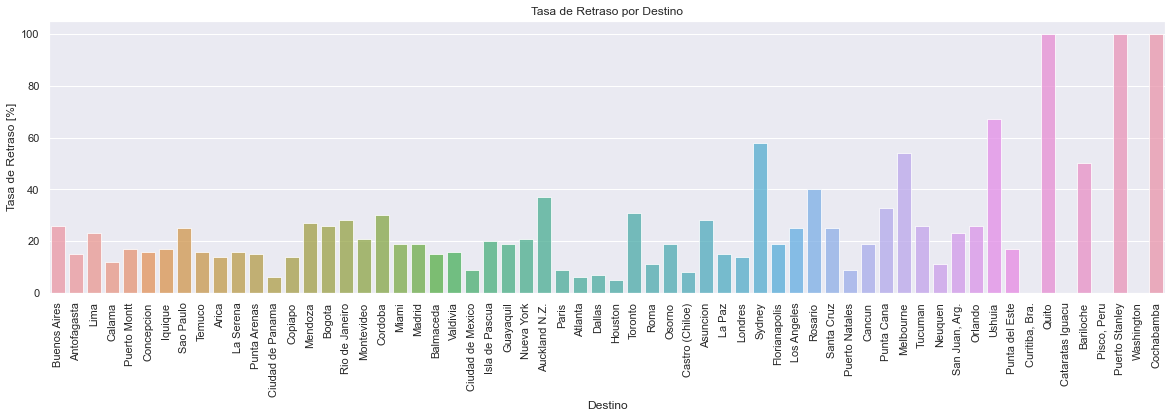

In [25]:
tasas_destinos_values = df['SIGLADES'].value_counts().index
plt.figure(figsize = (20,5))
sns.set(style="darkgrid")
sns.barplot(x=df['SIGLADES'].value_counts().index, y=tasas_destinos['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Destino')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Destino', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [26]:
tasas_aerolineas = calcular_tasa(df, 'OPERA')
tasas_aerolineas

,Tasa (%)
Grupo LATAM,18.0
Sky Airline,18.0
Aerolineas Argentinas,24.0
Copa Air,6.0
Latin American Wings,41.0
Avianca,27.0
JetSmart SPA,18.0
Gol Trans,36.0
American Airlines,7.0
Air Canada,46.0


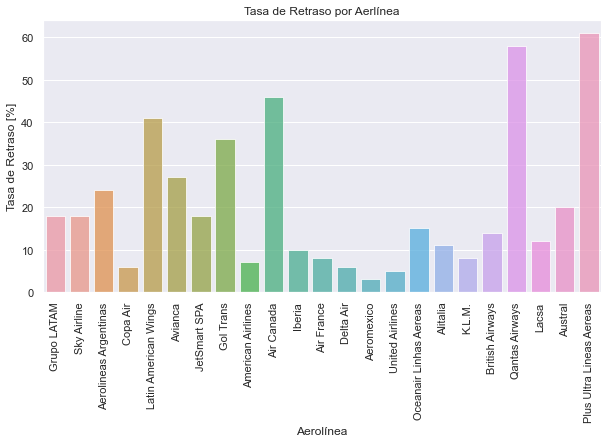

In [27]:
tasas_aerolineas_values = df['OPERA'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_aerolineas_values, y=tasas_aerolineas['Tasa (%)'], alpha = 0.75)
plt.title('Tasa de Retraso por Aerlínea')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Aerolínea', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [28]:
tasas_meses = calcular_tasa(df, 'MES')
tasas_meses

,Tasa (%)
12,25.0
1,16.0
11,20.0
10,23.0
7,29.0
8,17.0
9,17.0
2,15.0
3,12.0
5,16.0


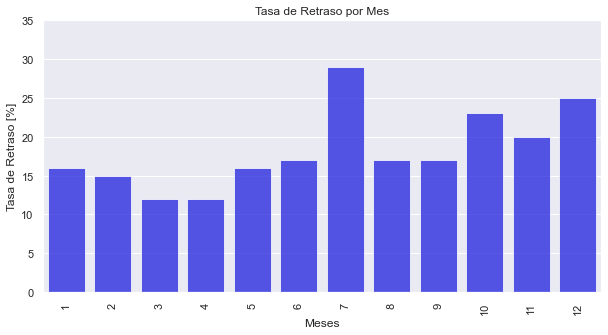

In [29]:
tasas_meses_values = df['MES'].value_counts().index

plt.figure(figsize = (10,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_meses_values, y=tasas_meses['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Mes')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Meses', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,35)
plt.show()

In [30]:
tasas_dias = calcular_tasa(df, 'DIANOM')
tasas_dias

,Tasa (%)
Viernes,22.0
Jueves,20.0
Lunes,20.0
Domingo,16.0
Miercoles,17.0
Martes,17.0
Sabado,16.0


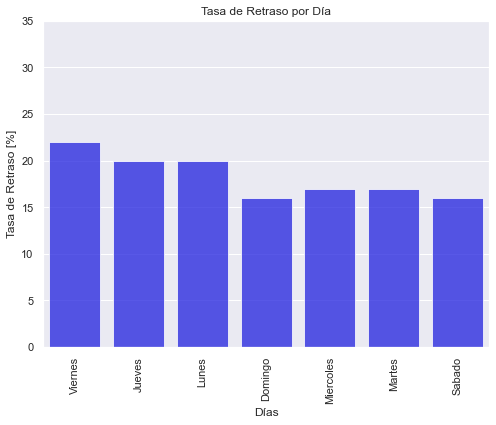

In [31]:
tasas_dias_values = df['DIANOM'].value_counts().index

sns.set(style="darkgrid")
plt.figure(figsize = (8,6))
sns.barplot(x=tasas_dias_values, y=tasas_dias['Tasa (%)'], color = 'blue', alpha = 0.75)
plt.title('Tasa de Retraso por Día')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Días', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,35)
plt.show()

In [32]:
tasas_temporada = calcular_tasa(df, 'temporada_alta')
tasas_temporada

,Tasa (%)
0,18.0
1,20.0


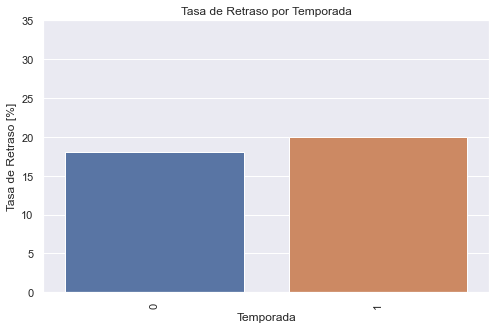

In [33]:
tasas_temporada_values = df['temporada_alta'].value_counts().index

plt.figure(figsize = (8, 5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_temporada_values, y=tasas_temporada['Tasa (%)'])
plt.title('Tasa de Retraso por Temporada')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Temporada', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(0,35)
plt.show()

In [34]:
tasas_tipovuelo = calcular_tasa(df, 'TIPOVUELO')
tasas_tipovuelo

,Tasa (%)
N,15.0
I,23.0


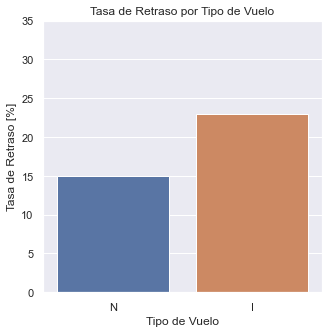

In [35]:
tasas_tipovuelo_values = df['TIPOVUELO'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_tipovuelo_values, y=tasas_tipovuelo['Tasa (%)'])
plt.title('Tasa de Retraso por Tipo de Vuelo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Vuelo', fontsize=12)
plt.ylim(0,35)
plt.show()

In [36]:
tasa_periododia = calcular_tasa(df, 'periodo_dia')
tasa_periododia

,Tasa (%)
tarde,20.0
mañana,16.0
noche,20.0


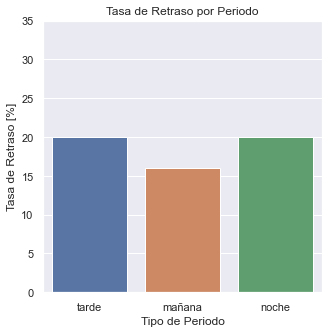

In [37]:
tasas_periodo_values = df['periodo_dia'].value_counts().index

plt.figure(figsize = (5,5))
sns.set(style="darkgrid")
sns.barplot(x=tasas_periodo_values, y=tasa_periododia['Tasa (%)'])
plt.title('Tasa de Retraso por Periodo')
plt.ylabel('Tasa de Retraso [%]', fontsize=12)
plt.xlabel('Tipo de Periodo', fontsize=12)
plt.ylim(0,35)
plt.show()

* ¿Qué variables esperarías que más influyeran en predecir atrasos?

Me parece que las que más podrían influir serían:
* **Aerolíneas**: Dependiendo de la calidad de gestión de cada aerolínea puede ser que afecte en sus programaciones. También puede que afecte el tipo de aerolínea, si es una low cost por ejemplo, estas llevan menos equipaje ya que es un costo extra para cada pasajero por lo que el tiempo de carga es menor, corriendo menor riesgo de retraso. 
* **Tipo de Vuelo**: esto puede afectar en cómo esté el clima del país de destino. Por ejemplo si se tiene que volar a argentina y se tiene que cruzar por la cordillera y hay un mal clima, es posible que se tenga que esperar un rato para poder salir.
* **Mes**: Esto va un poco de la mano con lo anterior, si es que es un mes del año donde el clima no es lo suficientemente adecuado, se tendría que esperar.  
 

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

In [39]:
data = shuffle(df[['OPERA', 'MES', 'TIPOVUELO', 'SIGLADES', 'DIANOM', 'atraso_15']], random_state = 111)

In [40]:
features = pd.concat([pd.get_dummies(data['OPERA'], prefix = 'OPERA'),pd.get_dummies(data['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data['MES'], prefix = 'MES')], axis = 1)
label = data['atraso_15']

In [41]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.33, random_state = 42)

In [42]:
x_train.shape, x_test.shape

((45698, 37), (22508, 37))

In [43]:
y_train.value_counts('%')

0    0.813799
1    0.186201
Name: atraso_15, dtype: float64

In [44]:
y_test.value_counts('%')

0    0.81762
1    0.18238
Name: atraso_15, dtype: float64

#### Utilizando Regresión logística

In [45]:
logReg = LogisticRegression()
model = logReg.fit(x_train, y_train)

In [46]:
y_pred = model.predict(x_test)

#### Métricas Regresión Logística

In [47]:
confusion_matrix(y_test, y_pred)

array([[18311,    92],
       [ 3985,   120]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



#### Utilizando XGBoost

In [49]:
import xgboost as xgb
from xgboost import plot_importance

In [50]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01)
modelxgb = modelxgb.fit(x_train, y_train)

In [51]:
y_predxgb = modelxgb.predict(x_test)
y_pred_proba = modelxgb.predict_proba(x_test)[:, 1]

#### Métricas XGBoost

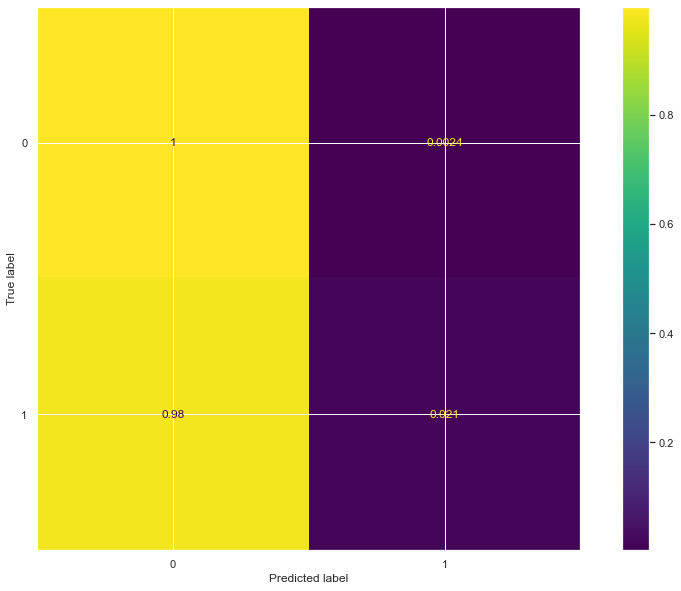

In [52]:
cm=confusion_matrix(y_test, y_predxgb, normalize="true")
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelxgb.classes_)
disp.plot()
plt.show()

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.57      0.03      0.06      4105

    accuracy                           0.82     22508
   macro avg       0.69      0.51      0.48     22508
weighted avg       0.77      0.82      0.75     22508



In [54]:
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.6502442109641209


#### Utilizando XGBoost dejando Features más importantes 

In [55]:
modelxgb.feature_importances_

array([0.01000503, 0.03812765, 0.07740478, 0.        , 0.        ,
       0.0532625 , 0.        , 0.        , 0.        , 0.11452045,
       0.        , 0.05899748, 0.00510735, 0.        , 0.00056586,
       0.        , 0.        , 0.0343819 , 0.        , 0.00872515,
       0.06874514, 0.03494435, 0.02305366, 0.17575087, 0.        ,
       0.01610018, 0.00777404, 0.0238743 , 0.00835021, 0.01279222,
       0.01183943, 0.06969909, 0.00991499, 0.01740216, 0.03937674,
       0.02739281, 0.05189165], dtype=float32)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

<Figure size 936x720 with 0 Axes>

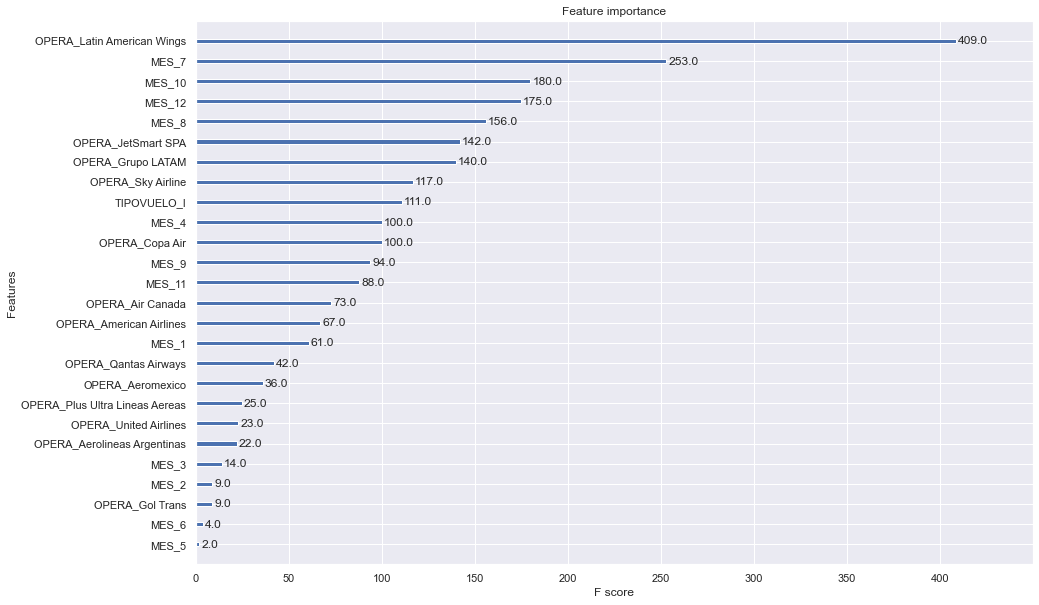

In [56]:
plt.figure(figsize = (13,10))
plot_importance(modelxgb)

In [57]:
features_importantes = features[['MES_7', 'TIPOVUELO_I', 'OPERA_Copa Air', 'OPERA_Latin American Wings',
                                'MES_12', 'OPERA_Grupo LATAM', 'MES_10', 'OPERA_JetSmart SPA', 'OPERA_Air Canada',
                                'MES_9', 'OPERA_American Airlines']]
labels_ = label

In [58]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(features_importantes, labels_, test_size = 0.33, random_state = 42)

In [59]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb = modelxgb.fit(x_train2, y_train2)

In [60]:
y_predxgb = modelxgb.predict(x_test2)
y_pred_proba = modelxgb.predict_proba(x_test2)[:, 1]

#### Métricas XGBoost dejando Features más importantes 

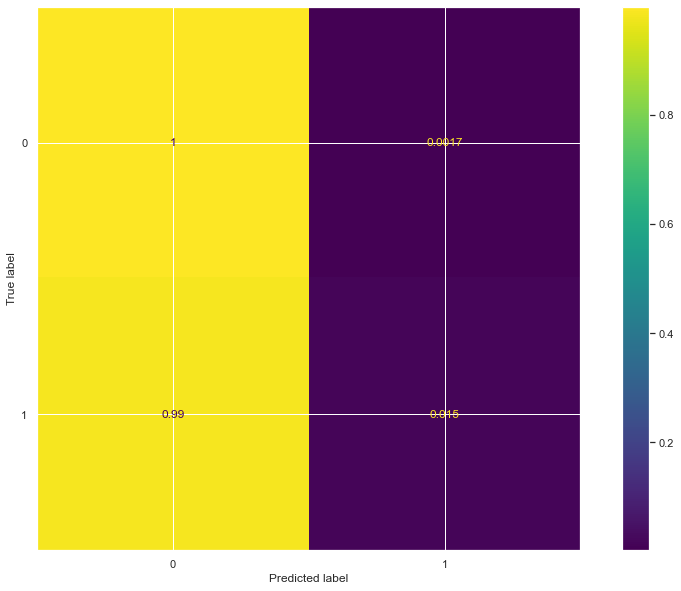

In [61]:
cm=confusion_matrix(y_test2, y_predxgb, normalize="true")
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelxgb.classes_)
disp.plot()
plt.show()

In [62]:
print(classification_report(y_test2, y_predxgb))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     18403
           1       0.66      0.01      0.03      4105

    accuracy                           0.82     22508
   macro avg       0.74      0.51      0.46     22508
weighted avg       0.79      0.82      0.74     22508



In [63]:
roc_auc = roc_auc_score(y_test2, y_pred_proba)
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.6404792471809427


### 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar laperformance?

Los modelos utilizados en la sección anterior fueron:
* **Regresión Logística**: Fue seleccionado ya que es el modelo más simple para poder resolver problemas de clasificación.
* **XGBoost**: Fue seleccionado porque en general tiene un gran desempeño y entrega buenos resultados ya sea para regresión y clasificación, además es bastante rápido y facilita el tuneo de hiperparámetros.

Los resultados obtenidos con ambos modelos fueron muy malos. Se utilizó matriz de confusión para validar los resultados. La cantidad de falsos negativos fue muy alta. Una de las posibles razones, la más clara, es el desbalanceo que existe en la clase 'atraso_15'. Del total de datos un 82% corresponde a no atraso y el 18% restante a atraso.
Para poder mejorar la performance se tomaron dos decisiones, la primera aplicar un Grid Search CV sobre XGBoost para tunear de mejor manera los hiperparámetros y la segunda realizar un upsampling de la clase desbalanceada, en este caso los atrasos.



### Grid Search CV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters = {
                'learning_rate': [0.01,0.05, 0.1],
                'n_estimators': [50, 100, 150],
                'subsample': [0.5, 0.9]
}

modelxgb_GridCV = GridSearchCV(modelxgb, param_grid = parameters,
    cv = 2, n_jobs=-1, verbose=1).fit(x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


In [78]:
y_predxgb_grid = modelxgb_GridCV.predict(x_test)
best_GridCV = modelxgb_GridCV.best_estimator_
y_pred_proba = best_GridCV.predict_proba(x_test)[:, 1]

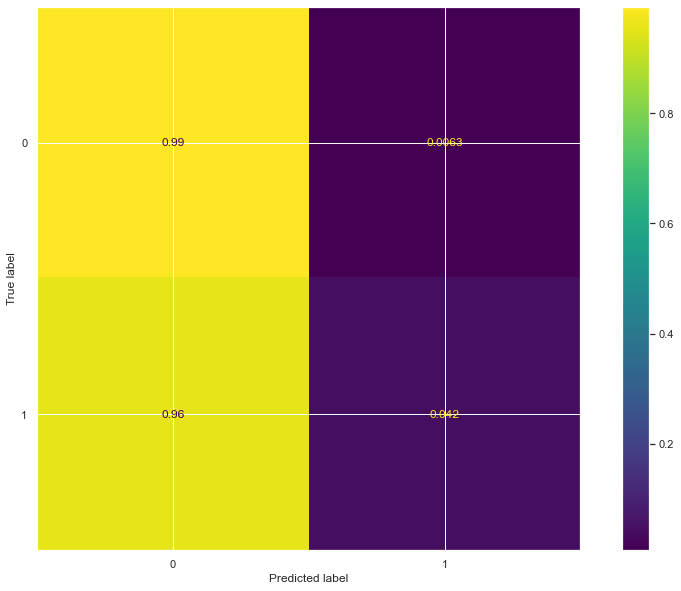

In [79]:
cm=confusion_matrix(y_test, y_predxgb_grid, normalize="true")
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelxgb.classes_)
disp.plot()
plt.show()

In [80]:
roc_auc = roc_auc_score(y_test2, y_pred_proba)
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.6687564974280328


### Upsampling

El upsampling se debe hacer después de separar las particiones de test y de train

In [106]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state = 42)

In [107]:
data_train['atraso_15'].value_counts()

0    37189
1     8509
Name: atraso_15, dtype: int64

In [108]:
#Resample
from sklearn.utils import resample

data_train_no_retraso = data_train[data_train['atraso_15'] == 0]
data_train_atraso = data_train[data_train['atraso_15'] == 1]

data_train_atraso_upsampled = resample(data_train_atraso, 
                                 replace = True,     # sample with replacement
                                 n_samples = 30000,    # to match majority class
                                 random_state = 42) # reproducible results

data_train_upsampled = pd.concat([data_train_no_retraso, data_train_atraso_upsampled])

In [109]:
data_train_upsampled['atraso_15'].value_counts()

0    37189
1    30000
Name: atraso_15, dtype: int64

In [110]:
features_upsampled = pd.concat([pd.get_dummies(data_train_upsampled['OPERA'], prefix = 'OPERA'),pd.get_dummies(data_train_upsampled['TIPOVUELO'], prefix = 'TIPOVUELO'), pd.get_dummies(data_train_upsampled['MES'], prefix = 'MES')], axis = 1)
label_upsampled = data_train_upsampled['atraso_15']

In [111]:
x_upsampled_train, x_upsampled_test, y_upsampled_train, y_upsampled_test = train_test_split(features_upsampled, label_upsampled, test_size = 0.33, random_state = 42)

In [112]:
modelxgb = xgb.XGBClassifier(random_state=1, learning_rate=0.01, subsample = 1, max_depth = 10)
modelxgb.fit(x_upsampled_train, y_upsampled_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

In [113]:
y_upsampled_predxgb = modelxgb.predict(x_upsampled_test)
y_pred_proba = modelxgb.predict_proba(x_upsampled_test)[:, 1]

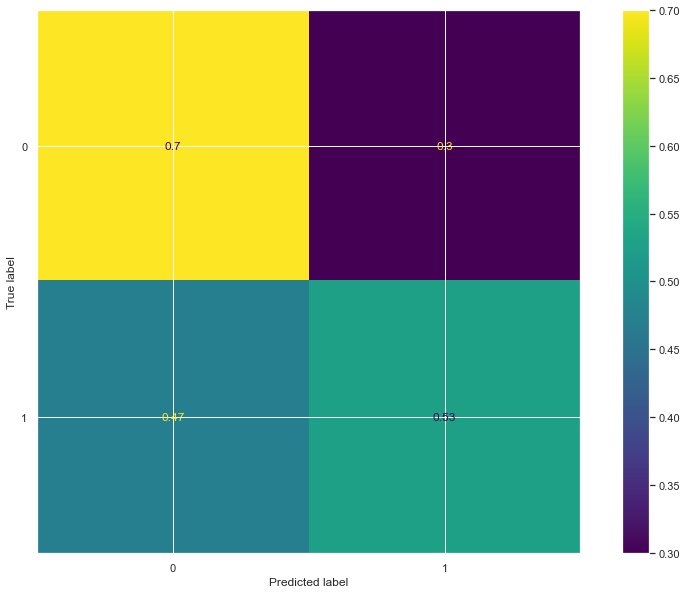

In [114]:
cm=confusion_matrix(y_upsampled_test, y_upsampled_predxgb, normalize="true")
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=modelxgb.classes_)
disp.plot()
plt.show()


In [115]:
modelxgb.score(x_upsampled_test, y_upsampled_test)

0.6232805664546972

In [116]:
print(classification_report(y_upsampled_test, y_upsampled_predxgb))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67     12261
           1       0.59      0.53      0.56      9912

    accuracy                           0.62     22173
   macro avg       0.62      0.61      0.61     22173
weighted avg       0.62      0.62      0.62     22173



In [117]:
roc_auc = roc_auc_score(y_upsampled_test, y_pred_proba)
print("ROC-AUC score:", roc_auc)

ROC-AUC score: 0.6683409139486283


Observando los dos métodos para incrementar la performance, se puede ver como el modelo no mejoró. Esto puede ser ya que la data creada al upsamplear no aporta más información. Si se pudiese pudiese balancear la clase tal vez los modelos tendrían un mejor desempeño.